In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

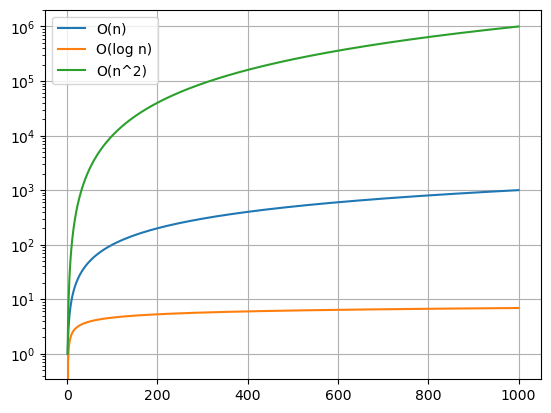

In [44]:
# O(n)
n_values = np.arange(1, 1001)

# O(n^2)
n_values_squared = n_values ** 2

# O(log n)
log_values = np.log(n_values)

# O(n)
n_values = np.arange(1, 1001)

# O(n^2)
n_values_squared = n_values ** 2

# O(log n)
log_values = np.log(n_values)

#take some values to plot the different functions
fig, ax = plt.subplots()
ax.plot(n_values, n_values, label="O(n)")
ax.plot(n_values, log_values, label="O(log n)")
ax.plot(n_values, n_values_squared, label="O(n^2)")

ax.legend()
ax.grid(True)
ax.set_yscale("log")

#store for later
complexity_fig = fig

In [45]:
def foo(a, b, counter):
    if a == 0:
        #print("a = 0")

        return (int(b), int(counter))
    
    elif b == 0: 
        #print("b = 0")

        return (int(a), int(counter))
    
    else:
        counter += 1
        #let (x,y) = (min(a,b), max(a,b))
        (x,y) = (min(a,b), max(a,b))

        #print(x,y)

        #recursive call, need to use return
        return foo(y, y % x, counter)

counter = 0
returned_value = 0

(returned_value, counter) = foo(1, 2 , 0)

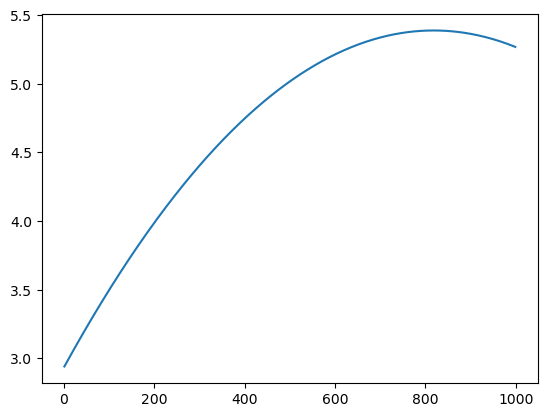

In [46]:
runtime_dict = defaultdict(list)

#we're going to run this many times to gather data on runtimes
for a in range(1, 1000):
    for b in range(1, 1000):
        returned_value, counter = foo(a, b, 0)

        #store the returned counter and the maximal of the 2 inputs (as a measure of complexity)
        #dictionary is best structure for this because you need to relate for polyfit function 
        complexity = max(a, b)
        runtime_dict[complexity].append(counter)

#get the average of the runtimes to pass to polyfit function 
complexities = sorted(runtime_dict.keys())
avg_runtimes = [sum(runtime_dict[c]) / len(runtime_dict[c]) for c in complexities]

#smoothen this curve so we don't have to look at jagged ugly plot
#https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html
coeffs = np.polyfit(complexities, avg_runtimes, deg = 2)
poly = np.poly1d(coeffs)

#use linspace to capture the range of the plot op
#https://numpy.org/devdocs/reference/generated/numpy.linspace.html
x_smooth = np.linspace(min(complexities), max(complexities), 500)
y_smooth = poly(x_smooth)

plt.plot(x_smooth, y_smooth)
plt.show()

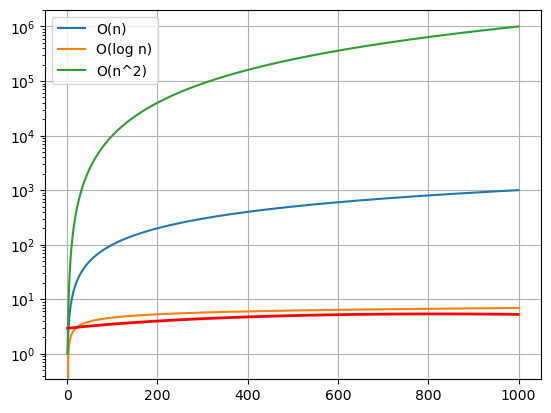

In [47]:
#plot the acquired data onto our already generated complexities graph
ax = complexity_fig.axes[0]
ax.plot(x_smooth, y_smooth, color='red', linewidth = 2)
complexity_fig.canvas.draw()

#we can see that it is O(log n)
complexity_fig

In [48]:
def longest_run(mylist, key, loop_counter):
    counters = []
    counter = 0
    #iterate by index to access individual elements
    for x in range(len(mylist)):
        loop_counter += 1

        #increment a counter and lazily append every match increment to the list
        if mylist[x] == key:
            counter += 1
            counters.append(counter)

        #streaks been broken so reset to 0 
        else:
            counter = 0

    #just return the highest count we reached
    return (max(counters), loop_counter)

(returned_counter, runtime) = longest_run([2,12,12,8,12,12,12,0,12,1], 12, 0)

print(f"longest run: {returned_counter} and runtime taken: {runtime}")

longest run: 3 and runtime taken: 10


In [49]:
class Result:
    """ done """
    def __init__(self, left_size, right_size, longest_size, is_entire_range):
        self.left_size = left_size              # the length of the longest run on left side of input
                                                # eg, with a key of 12, [12 12 3] has left_size of 2 
        self.right_size = right_size            # length of longest run on right side of input
                                                # eg, key 12, [3 12 12] has right_size of 2
        self.longest_size = longest_size        # length of longest run in input
                                                # eg, [12 12 4 12 12 12]: longest_size is 3
        self.is_entire_range = is_entire_range  # True if the entire input matches the key
        
    def __repr__(self):
        return('longest_size = %d left_size = %d right_size = %d is_entire_range = %s' %
              (self.longest_size, self.left_size, self.right_size, self.is_entire_range))
    
    
def longest_run_recursive(mylist, key):
    #base cases to handle termination and/or invalid inputs
    if (len(mylist) == 0):
        return Result(0, 0, 0, True)
    
    elif (len(mylist) == 1):
        if mylist[0] == key:
            return Result(1, 1, 1, True)
        
        else:
            return Result(0, 0, 0, False)
        
    mid = int(len(mylist) / 2)

    left = mylist[0 : mid]
    right = mylist[mid:]

    print(f"left side of current operation: {left}")
    print(f"right side of current operation: {right}")

    left_result = longest_run_recursive(left, key)
    right_result = longest_run_recursive(right, key)

    is_entire = left_result.is_entire_range and right_result.is_entire_range

    #if left side has divided, and happens to contain nothing but matches
    if left_result.is_entire_range:
        #store this value to both left and right to capture correlation between either span of elements
        left_size = left_result.left_size + right_result.left_size

    else: 
        left_size = left_result.left_size
    
    if right_result.is_entire_range:
        right_size = right_result.right_size + left_result.right_size

    else: 
        right_size = right_result.right_size

    cross_run = left_result.right_size + right_result.left_size
    longest_size = max(left_result.longest_size, right_result.longest_size, cross_run)

    return Result(left_size, right_size, longest_size, is_entire)


print(longest_run_recursive([2,12,12,8,12,12,12,0,12,1], 12))
#longest_run_recursive([2,12,12,8,12,12,12,0,12,1], 12) == 3

left side of current operation: [2, 12, 12, 8, 12]
right side of current operation: [12, 12, 0, 12, 1]
left side of current operation: [2, 12]
right side of current operation: [12, 8, 12]
left side of current operation: [2]
right side of current operation: [12]
left side of current operation: [12]
right side of current operation: [8, 12]
left side of current operation: [8]
right side of current operation: [12]
left side of current operation: [12, 12]
right side of current operation: [0, 12, 1]
left side of current operation: [12]
right side of current operation: [12]
left side of current operation: [0]
right side of current operation: [12, 1]
left side of current operation: [12]
right side of current operation: [1]
longest_size = 3 left_size = 0 right_size = 0 is_entire_range = False
